## Hough Line Transform

- Cartesian coordinate system : (m, b)
- Polar coordinate system : (r, theta)
    - y = (-cos(theta)/sin(theta))x + (r / sin(theta))
    - r = x cos(theta) + y sin(theta)
    
    
- Hough Circle Transform도 존재.
    - HoughCircles()

### The Standard Hough Transform
- HoughLines()

### The Probabilistic Hough Line Transform
- 미리 detect된 lines (x0, y0, x1, y1) 에서 확률적으로 추출.
- HoughLinesP()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./data/chessboard.jpg')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

In [4]:
lines = cv2.HoughLines(edges,1,np.pi/180,100)

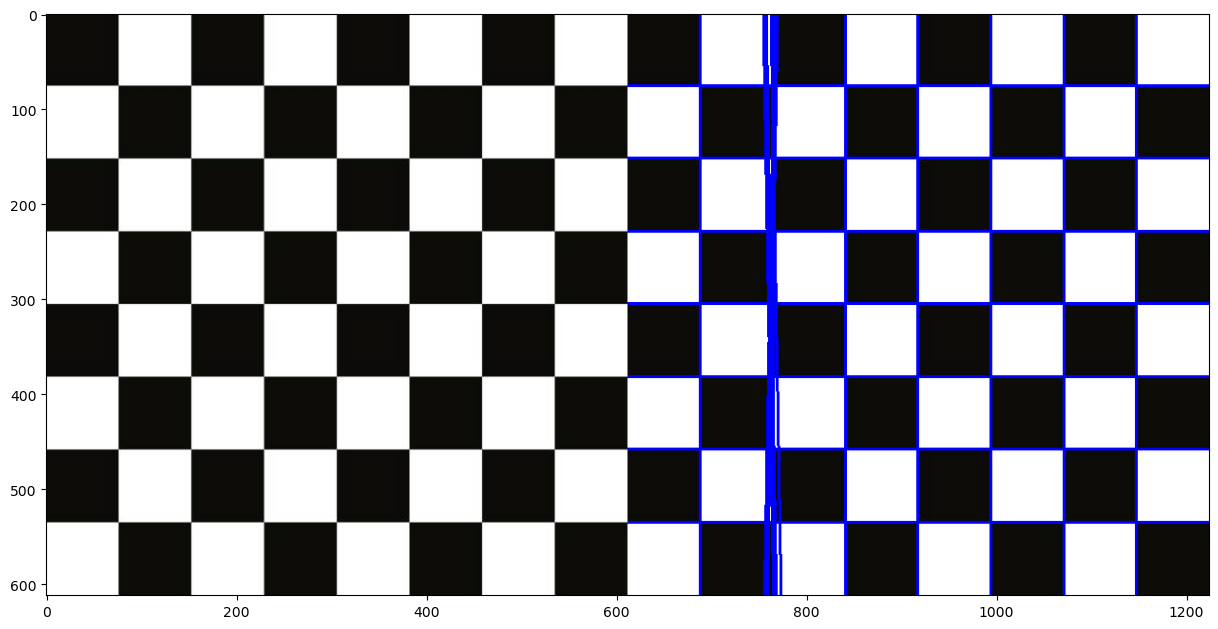

In [8]:
# Voting
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        
res = np.hstack((img_original,img))
plt.figure(figsize=(15,8))
plt.imshow(res)

In [9]:
import cv2
import numpy as np

img = cv2.imread('./data/cv_desk.png')
edges = cv2.Canny(img,50,200,apertureSize = 3)
gray = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
minLineLength = 100
maxLineGap = 0

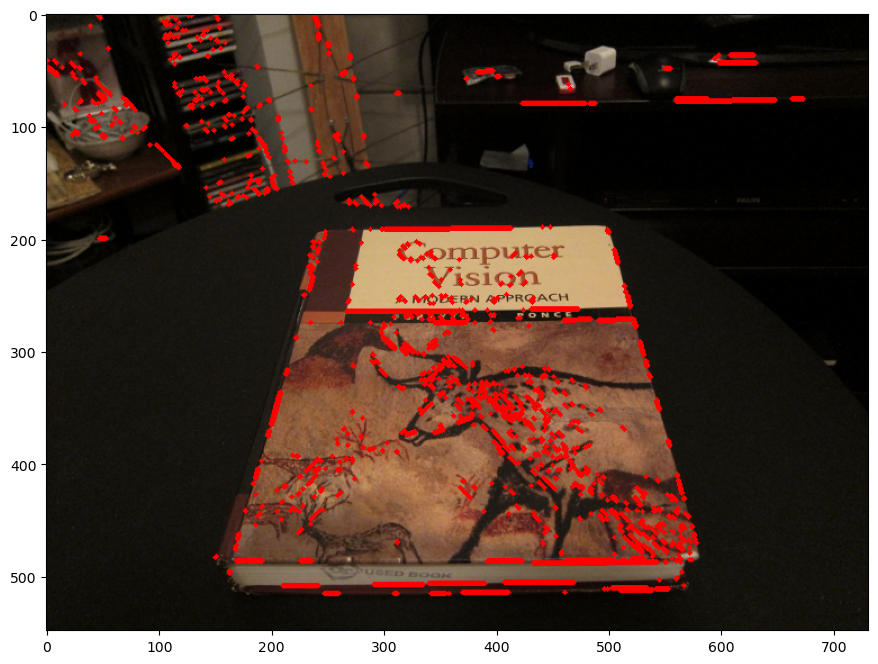

In [10]:
lines = cv2.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)
        
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()